# Model Testing & Validation

In [1]:
import tensorflow
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

2025-04-11 03:13:17.572497: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 03:13:17.575889: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 03:13:17.584659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744341197.598824   85314 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744341197.603089   85314 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744341197.615218   85314 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Load the model and dataset:

In [2]:
model = keras.models.load_model('trained_model.keras')
data_frame = pd.read_csv('testing_data.csv')

2025-04-11 03:13:20.511789: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,061 (15.87 KB)

 Trainable params: 1,353 (5.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,708 (10.58 KB)

In [4]:
x_test = data_frame.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg", "gust_diff"]
).to_numpy()
y_test = data_frame[["wind_spd_kmh", "gust_kmh", "wind_dir_deg"]].to_numpy()

In [5]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)

results = pd.DataFrame({
    "Model": ["Base Model"],
    "Loss": [loss],
    "MAE": [mae]
})
print(results)

        Model      Loss       MAE
0  Base Model  0.018067  0.068083


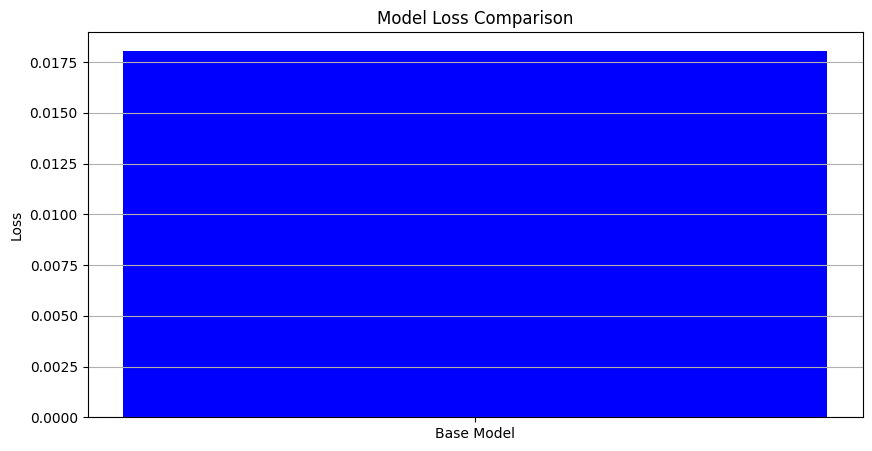

In [6]:
# Visualize the loss of the different models
plt.figure(figsize=(10, 5))
plt.bar(
    ["Base Model"],
    [loss],
    color=["blue"],
)
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.grid(axis="y")
plt.show()

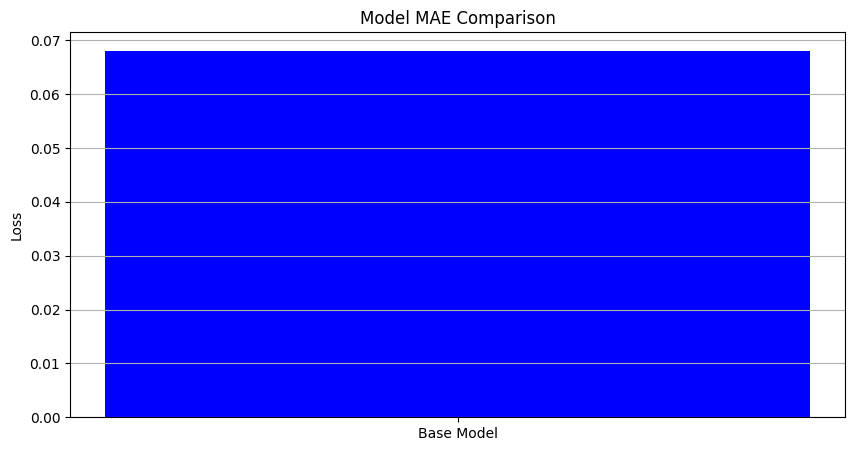

In [7]:
# Visualize the loss of the different models
plt.figure(figsize=(10, 5))
plt.bar(
    ["Base Model"],
    [mae],
    color=["blue"],
)
plt.ylabel("Loss")
plt.title("Model MAE Comparison")
plt.grid(axis="y")
plt.show()